In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
path = "/content/drive/Shared drives/ML 2020 Project/"
data = "comedy.csv"

dataPath = os.path.join(path, data)

print(dataPath)
print(os.path.exists(dataPath))

/content/drive/Shared drives/ML 2020 Project/comedy.csv
False


In [ ]:
#load dataset
joke = pd.read_csv(dataPath, sep=',')

#preprocessing data
X = joke.content
y = joke.flattened_categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

count_vect = CountVectorizer()

X_train = count_vect.fit_transform(X_train)
y_train = count_vect.transform(y_train)
X_test = count_vect.transform(X_test)
y_test = count_vect.transform(y_test)



X_train_array = X_train.toarray()
y_train_array = y_train.toarray()
X_test_array = X_test.toarray()
y_test_array = y_test.toarray()
print(y_train_array)
print(X_train_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#using classification
neighbors = np.arange(18,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

print("Starting training.")

for i,k in enumerate(neighbors):
  print("Training neighbors:", str(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_array, y_train_array)
  score = knn.score(X_train_array, y_train_array)
  print("Training Accuracy: ", score)
  train_accuracy[i] = score
  score = knn.score(X_test_array, y_test_array)
  print("Testing Accuracy: ", score)
  test_accuracy[i] = score
# print(classification_report(y_test.toarray(), pred_kneigh))

Starting training.
Training neighbors: 18
Training Accuracy:  0.09428024083196497
Testing Accuracy:  0.08210180623973727
Training neighbors: 19
Training Accuracy:  0.09359605911330049
Testing Accuracy:  0.08210180623973727


In [4]:
neighbors = np.arange(4, 20)
train_accuracy = [.12712096332785988, .1354679802955665, .11193212917350849, .11795292829775589, .10426929392446634, .1082375478927203, .10153256704980843, .10591133004926108, .09961685823754789, .10057471264367816, .09592227695675971, .09742747673782157, .09592227695675971, .09592227695675971, .09428024083196497, .09359605911330049]
test_accuracy = [.09250136836343732, .09195402298850575, .08648056923918993, .09085933223864258, .09140667761357417, .08976464148877943, .08812260536398467, .08921729611384784, .08538587848932677, .08757525998905309, .08538587848932677, .08593322386425835, .08593322386425835, .08702791461412152, .08210180623973727, .08210180623973727]

print(len(neighbors))
print(len(train_accuracy))
print(len(test_accuracy))

16
16
16


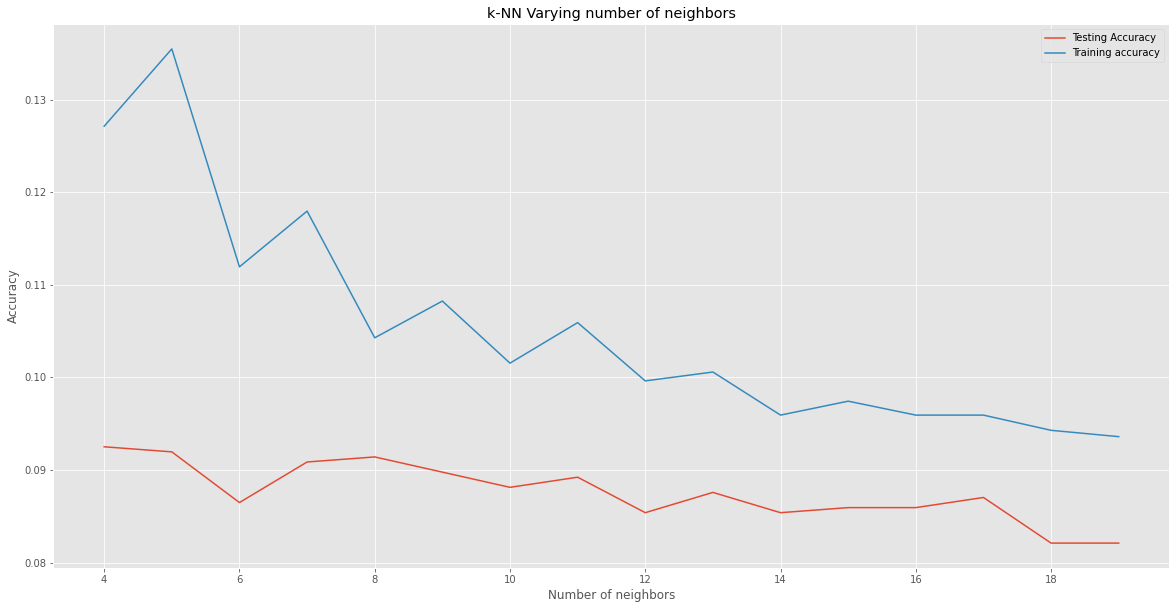

In [7]:
plt.figure(figsize=(20,10))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print(score)

0.08812260536398467


In [ ]:
score_train = kneigh.score(X_train_array, y_train_array)
print(score_train)

0.10153256704980843
